In [1]:
import sys, os
import pydicom
from pydicom.data import get_testdata_files
import numpy as np
import scipy

In [2]:
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
curr_dir = os.getcwd()
data_dir = os.path.join(curr_dir, 'data')
pelvis_dir = os.path.join(data_dir, 'Pelvis')
filename = os.path.join(pelvis_dir, 'vhf.901.dcm')

ds = pydicom.dcmread(filename)

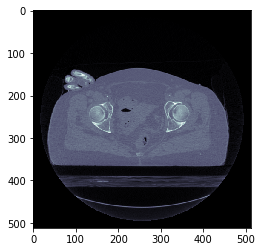

In [4]:
ct_901 = ds.pixel_array
plt.imshow(ct_901, cmap = plt.cm.bone)

In [5]:
from skimage.transform import radon, iradon, rescale

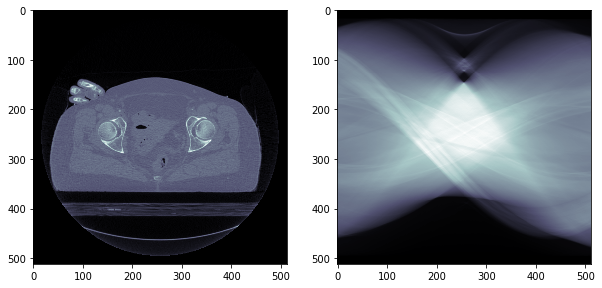

In [6]:
theta = np.linspace(0,180,512,endpoint=False) # viewpoints
sin_901 = radon(ct_901, theta=theta, circle=True)
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(ct_901,cmap = plt.cm.bone)
plt.subplot(122)
plt.imshow(sin_901,cmap = plt.cm.bone)

In [7]:
noisy_dir = os.path.join(data_dir, 'S70')
dirty_name = os.path.join(noisy_dir, 'IM0001S0')

ds_s = pydicom.dcmread(dirty_name)

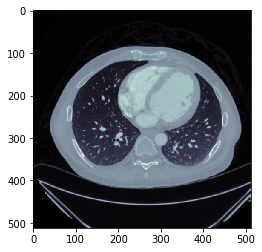

In [8]:
ct_0001 = ds_s.pixel_array
plt.imshow(ct_0001, cmap = plt.cm.bone)

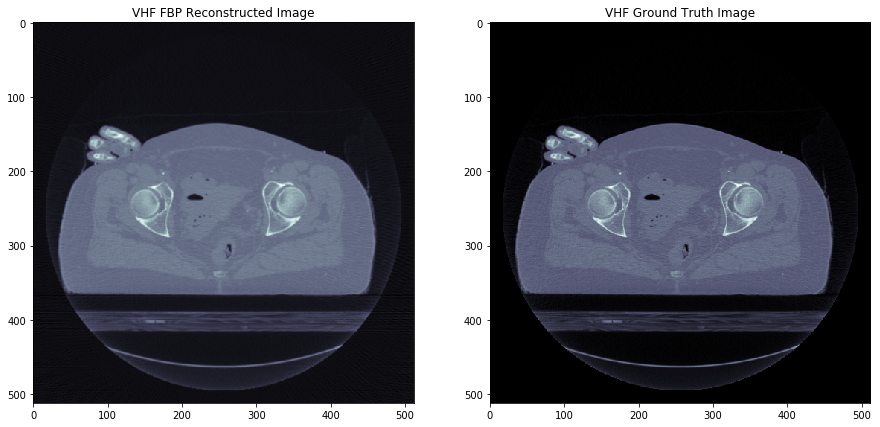

In [9]:
img_id = 901
iradon_ex = os.path.join(data_dir, 'train/fbp/'+ str(img_id) + 'fbp.npy')
gt_ex = os.path.join(data_dir, 'train/gt/'+ str(img_id) +'_gt.npy')
irad_array = np.load(iradon_ex)
gt_array = np.load(gt_ex)


plt.figure(figsize= (15,15));
plt.subplot(121);
plt.imshow(irad_array, cmap = plt.cm.bone);
plt.title('VHF FBP Reconstructed Image');
plt.subplot(122);
plt.imshow(gt_array, cmap = plt.cm.bone);
plt.title('VHF Ground Truth Image');

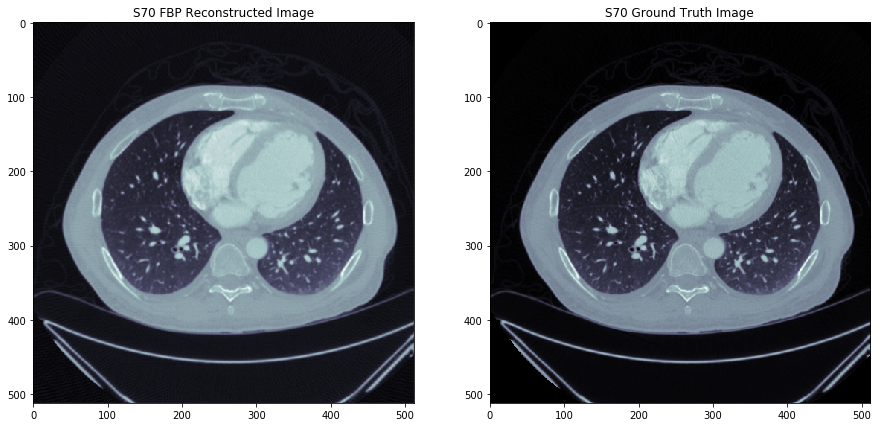

In [10]:
img_id = 'IM0001S0'
iradon_ex = os.path.join(data_dir, 'test/fbp/'+ img_id + 'fbp.npy')
gt_ex = os.path.join(data_dir, 'test/gt/'+ img_id +'_gt.npy')
irad_array = np.load(iradon_ex)
gt_array = np.load(gt_ex)


plt.figure(figsize= (15,15));
plt.subplot(121);
plt.imshow(irad_array, cmap = plt.cm.bone);
plt.title('S70 FBP Reconstructed Image');
plt.subplot(122);
plt.imshow(gt_array, cmap = plt.cm.bone);
plt.title('S70 Ground Truth Image');

c:\users\daniel\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\radon_transform.py:58: UserWarning: The default of `circle` in `skimage.transform.radon` will change to `True` in version 0.15.
  warn('The default of `circle` in `skimage.transform.radon` '
c:\users\daniel\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\radon_transform.py:204: UserWarning: The default of `circle` in `skimage.transform.iradon` will change to `True` in version 0.15.
  warn('The default of `circle` in `skimage.transform.iradon` '


(512, 512)
(512, 512)
(512, 512)


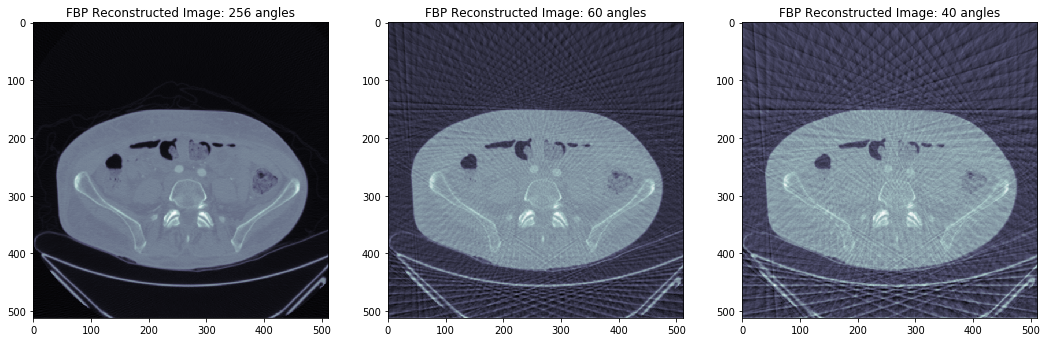

In [11]:
img_id = 'IM0694S0'
gt_ex = os.path.join(data_dir, 'test/gt/'+ img_id +'_gt.npy')
gt_array = np.load(gt_ex)
sparsities = [256, 60, 40]

plt.figure(figsize=(18,15))
i = 0
for sp in sparsities:
    theta = np.linspace(0, 180, sp, endpoint = False) 
    raw = radon(gt_array, theta=theta)
    fbp = iradon(raw, theta=theta)
    print(gt_array.shape)
    plt.subplot(131 + i)
    plt.imshow(fbp, cmap = plt.cm.bone)
    plt.title("FBP Reconstructed Image: "+ str(sp) + " angles")
    i += 1